In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *
fastbook.setup_book()


## Building a Vision Learner

In [4]:
# Specify the path for the image data 
path = untar_data(URLs.PETS)/'images'



# vision learner
data_loader = ImageDataLoaders.from_name_func(
    # SPecify the path
    path,
    # Specify the image files
    get_image_files(path),
    # SPecify the percentage of data used for validation
    valid_pct=0.2,
    # Set seed for reproducible results
    seed=42,
    # Specify the labels - Uppercase for cats - lowercase for dogs
    label_func=lambda image_label_str: image_label_str[0].isupper(),
    # Resizing the images
    item_tfms=Resize(224)
)


# Vision Learner
vision_learner = vision_learner(
    # DataLoader
    data_loader,
    # Specify the pretrained model
    resnet34,
    # Using error_rate as the evaluation metric
    metrics=error_rate
)


vision_learner.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/mklomo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:01<00:00, 44.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.189638,0.031495,0.008119,04:16


epoch,train_loss,valid_loss,error_rate,time
0,0.061656,0.026253,0.006766,06:04


## Testing the Vision Learner

In [13]:
from ipywidgets import FileUpload
from io import BytesIO


# Get the image with the image downloader
image_uploader = FileUpload()


image_uploader

FileUpload(value=(), description='Upload')

In [15]:
# Convert the image uploaded into memory into image for Vision Learner and make determination
img = PILImage.create(BytesIO(image_uploader.value[-1]['content']))

is_cat, _, probs = vision_learner.predict(img)

print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.228495


# Vision learner for Segmentation

In [4]:
path = untar_data(URLs.CAMVID_TINY)

# Lets get the Data Loader
data_loader = SegmentationDataLoaders.from_label_func(
    # path
    path,
    # Batch size 
    bs=8,
    fnames=get_image_files(path/'images'),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)


segmentation_learner = unet_learner(
    data_loader,
    resnet34,
)


segmentation_learner.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.096936,2.194726,00:10


epoch,train_loss,valid_loss,time
0,1.771480,1.550110,00:10
1,1.539046,1.405658,00:11
2,1.397802,1.206226,00:11
3,1.294544,1.093155,00:11
4,1.189900,1.020623,00:11
5,1.091774,0.935588,00:10
6,1.011729,0.862374,00:11
7,0.942658,0.850686,00:11


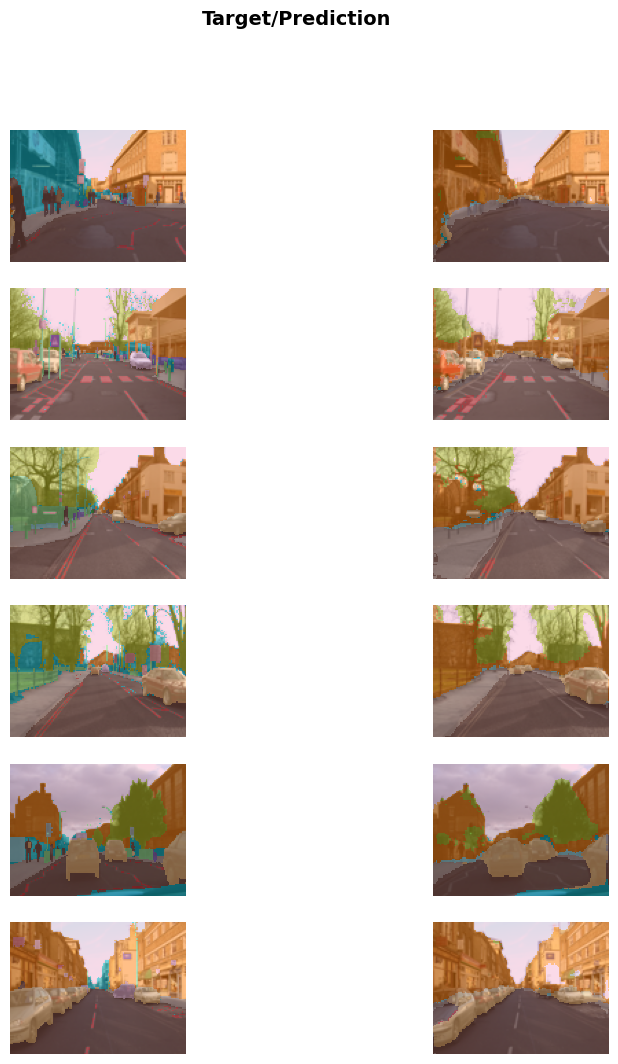

In [5]:
# Preview the results
segmentation_learner.show_results(
    max_n=6,
    figsize=(10,12)
)

# Learner for NLP

In [ ]:
from fastai.text.all import *


path = untar_data(URLs.IMDB)

data_loader = TextDataLoaders.from_folder(
    path,
    valid='test',
    bs=8
)

nlp_learner = text_classifier_learner(
    data_loader,
    AWD_LSTM,
    drop_mult=0.5,
    metrics=accuracy
)


nlp_learner.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.513718,0.420511,0.814760,46:02


epoch,train_loss,valid_loss,accuracy,time


In [1]:
nlp_learner

NameError: name 'nlp_learner' is not defined